In [1]:
import numpy as np
import matplotlib.pyplot as plt
import serial

x_list = [41, 51, 182, 245, 249, 186, 154, 108, 136, 187, 29, 64, 208, 11, 5, 31, 134, 223, 194, 62, 124, 82, 166, 224, 113, 15, 30, 46, 68, 177, 33, 38, 52, 52, 239, 175, 250, 112, 169, 152, 108, 131, 234, 194, 116, 241, 23, 208, 140, 7]
y_list = [245, 63, 147, 21, 188, 236, 38, 59, 86, 130, 240, 164, 196, 89, 17, 34, 106, 213, 108, 210, 108, 188, 133, 32, 0, 152, 189, 49, 44, 127, 185, 159, 236, 40, 171, 1, 160, 174, 10, 149, 47, 6, 162, 199, 100, 228, 57, 200, 75, 194]
data = [(41, 245), (51, 63), (182, 147), (245, 21), (249, 188), (186, 236), (154, 38), (108, 59), (136, 86), (187, 130), (29, 240), (64, 164), (208, 196), (11, 89), (5, 17), (31, 34), (134, 106), (223, 213), (194, 108), (62, 210), (124, 108), (82, 188), (166, 133), (224, 32), (113, 0), (15, 152), (30, 189), (46, 49), (68, 44), (177, 127), (33, 185), (38, 159), (52, 236), (52, 40), (239, 171), (175, 1), (250, 160), (112, 174), (169, 10), (152, 149), (108, 47), (131, 6), (234, 162), (194, 199), (116, 100), (241, 228), (23, 57), (208, 200), (140, 75), (7, 194)]

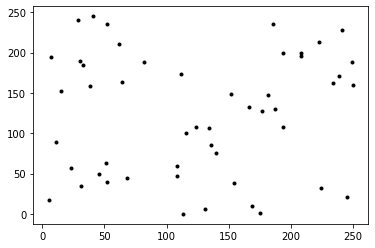

In [2]:
plt.plot(x_list, y_list, 'k.')

In [3]:
transmit_data = np.array(data, dtype=np.uint8)
print((transmit_data))

[[ 41 245]
 [ 51  63]
 [182 147]
 [245  21]
 [249 188]
 [186 236]
 [154  38]
 [108  59]
 [136  86]
 [187 130]
 [ 29 240]
 [ 64 164]
 [208 196]
 [ 11  89]
 [  5  17]
 [ 31  34]
 [134 106]
 [223 213]
 [194 108]
 [ 62 210]
 [124 108]
 [ 82 188]
 [166 133]
 [224  32]
 [113   0]
 [ 15 152]
 [ 30 189]
 [ 46  49]
 [ 68  44]
 [177 127]
 [ 33 185]
 [ 38 159]
 [ 52 236]
 [ 52  40]
 [239 171]
 [175   1]
 [250 160]
 [112 174]
 [169  10]
 [152 149]
 [108  47]
 [131   6]
 [234 162]
 [194 199]
 [116 100]
 [241 228]
 [ 23  57]
 [208 200]
 [140  75]
 [  7 194]]


In [ ]:
test = serial.Serial("COM4",115200)
test.write(transmit_data)

In [ ]:
result=[]
for l in range(309):
    result.append(int.from_bytes(test.read(),byteorder='big'))

In [ ]:
C1_size = result[-3]
C2_size = result[-2]
C3_size = result[-1]

C1_out_x = []
C1_out_y = []
C2_out_x = []
C2_out_y = []
C3_out_x = []
C3_out_y = []

for i in range(C1_size):
    C1_out_x.append(result[2*i])
    C1_out_y.append(result[2*i + 1])
for i in range(C2_size):
    C2_out_x.append(result[100 + 2*i])
    C2_out_y.append(result[100 + 2*i + 1])
for i in range(C3_size):
    C3_out_x.append(result[200 + 2*i])
    C3_out_y.append(result[200 + 2*i + 1])

centroid_1_x = result[300]
centroid_1_y = result[301]
centroid_2_x = result[302]
centroid_2_y = result[303]
centroid_3_x = result[304]
centroid_3_y = result[305]
    
plt.plot(C1_out_x, C1_out_y, 'r.', C2_out_x, C2_out_y, 'g.', C3_out_x, C3_out_y, 'b.', result[300], result[301], 'rx', result[302], result[303], 'gx', result[304], result[305], 'bx')